# Regresión Lineal

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import ipyvolume as ipv

In [2]:
x= np.arange(0,40)
x1 = np.linspace(0,40)
np.random.seed(100)
y = 3.4 + 6.7*x + np.random.randn(x.shape[0])*50

(0, 400)

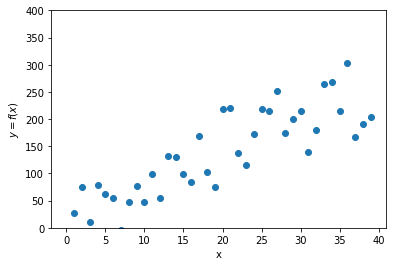

In [3]:
plt.scatter(x,y)
plt.ylabel("$y=f(x)$")
plt.xlabel("x")
plt.ylim(0,400)

Lo que buscamos es encontrar una función que pueda "replicar" nuestros datos de manera coherente, parece razonable plantear una relación lineal para nuestro ejemplo

$$ y_i = \theta_0 + \theta_1 x_i + \epsilon_i$$

PARTE DETERMINISTICA:  
$$  \theta_0 + \theta_1 x_i $$

PARTE ESTOCASTICA:
$$\epsilon_i$$

In [4]:
def f_update(t0,t1):
    plt.scatter(x,y)
    plt.ylabel("y")
    plt.xlabel("x")
    plt.plot(x, t0 + t1*x, c="purple")
    plt.ylim(0,400)

In [5]:
interactive(f_update, t0=(-100,200), t1=(-30,30))

interactive(children=(IntSlider(value=50, description='t0', max=200, min=-100), IntSlider(value=0, description…

# Necesitamos una medida para saber si estamos cerca de nuestro objetivo:

$$ y_i - (\theta_0 + \theta_1 x_i) = \epsilon_i$$

* $\theta_0$ y $\theta_1$ son parámetros poblacionales, y no los llegaremos a conocer
* Nos aproximaremos a ellos a través de un *ESTIMACIÓN DE PARÁMETROS*
* ADVERTENCIA por temas de notación utilizaremos $\theta_0$, $\theta_1$ en lugar de  $\hat{\theta_0}$, $\hat{\theta_1}$.  

$$h(x_i|\Theta) = \hat{y_i} = \theta_0 + \theta_1 x_i $$
Por simplificar la notación utilizaremos solamente:
$$ h(x_i)$$ en lugar de: $$h(x_i|\Theta)$$

### Definimos como métrica de error, el error cuadrático medio

$$ \frac{1}{2} (y_i - h(x_i))^2 $$

### Sumando los errores

$$ \sum_{i=1}^m{\epsilon_i}  \sum_{i=1}^m{y_i - h(x_i)} $$


* Al existir errores positivos y negativos usar una sumatoria simple tenderá a "eliminar" los errores. 
* Utilizamos la sumatoria de los cuadrados de los errores

 $$ \sum_{i=1}^m{\epsilon_i^2} = \sum_{i=1}^m Loss(y_i, h(x_i))  = \sum_{i=1}^m{[y_i - h(x_i)]^2} $$

### Definimos la funcion de costo como

 $$\tiny J(\Theta) =  \frac{1}{2m} \sum_{i=1}^m{[y_i - h(x_i)]^2} $$

In [7]:
def f_update_e(t0,t1):
    plt.scatter(x,y)
    plt.ylabel("y")
    plt.xlabel("x")
    plt.plot(x, t0 + t1*x, c="purple")
    plt.ylim(0,400)
    print(round(1/len(y)*round(np.sum(np.square(y - (t0 + t1*x))),2 )))

In [8]:
interactive(f_update_e, t0=(-100,200), t1=(-30,30))

interactive(children=(IntSlider(value=50, description='t0', max=200, min=-100), IntSlider(value=0, description…

 ### Nuestro objetivo es: MINIMIZAR LA FUNCIÓN DE COSTO
 $$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2m}\sum_{i=1}^m{[y_i - h(x_i)]^2} $$

Tendremos 2 formas de solucionar este problema.  
* De manera Iterativa
* De manera Analítica

### Solución Analítica

Derivamos nuestra función de costo respecto a los parámetros de nuestro vector $\Theta$

$$\min_{\Theta} \ \  J(\Theta) =  \sum_{i=1}^m{[y_i - h(x_i)]^2} $$

Reexpresamos en términos de $\theta_i$

$$\min_{\Theta} \ \  J(\Theta) =  \sum_{i=1}^N{[y_i - \theta_0 - \theta_1x_i]^2} $$

Derivamos y obtenemos el gradiente: 

$$\frac{\partial J}{\partial \theta_0} = 2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-1)$$

$$\frac{\partial J}{\partial \theta_1} = 2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-x_i)$$

Igualamos a 0 

$$\nabla J = \;
\begin{bmatrix}
 \frac{\partial J}{\partial \theta_0} \\
 \frac{\partial J}{\partial \theta_1} 
\end{bmatrix}
=
 \begin{bmatrix}
      2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-1) \\
      2\sum{(y_i−\theta_0 − \theta_1 x_i)}(-x_i)\\
    \end{bmatrix}
     = 
     \begin{bmatrix}
     0 \\ 
     0
     \end{bmatrix}
     $$

$$  \begin{bmatrix}
      \sum{(y_i−\theta_0 − \theta_1 x_i)} \\
      \sum{(y_i−\theta_0 − \theta_1 x_i)}(x_i)\\
    \end{bmatrix}
     = 
     \begin{bmatrix}
     0 \\ 
     0
     \end{bmatrix}
     $$

Resolviendo el sistema de ecuaciones obtenemos:

$$\theta_0^* = \bar{y} - \theta_1 \bar{x}$$

$$\theta_1^* = \frac{\sum x_i y_i - \bar{y}\sum x_i}{\sum x_i^2 - \bar{x} \sum{x_i}}$$

## Esto se puede generalizar a un modelo lineal con más variables:

$$ y_i = \theta_0 + \theta_1x_{1i} + \theta_2x_{2i} + ... + \theta_kx_{ki} + \epsilon_i $$

$$ Y = X\Theta + U $$

### De manera similar, se puede minimizar la función de costo de la función con k variables, llegando al siguiente resultado: 

$$ \Theta^* = (X'X)^{-1}X'Y$$

## Leemos los datos

In [21]:
ex2 = pd.read_csv("ejemplo2.csv", index_col=0)

ex2.head()

,Y,X1,X2,X3
0,-6.852697,-60.0,3.60000,-2.160000
1,-6.887755,-59.7,3.56409,-2.127762
2,-5.490239,-59.4,3.52836,-2.095846
3,-6.912853,-59.1,3.49281,-2.064251
4,-5.121870,-58.8,3.45744,-2.032975


In [22]:
ipv.quickscatter(ex2["X1"],ex2["X2"],ex2["Y"], size=1, marker="sphere")

## Implementamos la optimización matricial

$$ \Theta^* = (X'X)^{-1}X'Y$$

In [23]:
def reg_lin_Mat(X,Y):
    """
    X: Matriz de dimensiones (n,k+1) primera columna de 1
    Y: Vector de salidas
    """
    return np.linalg.inv(X.T@X)@(X.T@Y)

In [32]:
Y = ex2["Y"]
type(Y)
Y.head()

Y = Y.values ## Cambiando el tipo de datos a arrays de numpy

In [35]:
X = ex2.iloc[:,1:].copy()
X.insert(0,"X0",1) #index, name, value
X.head()

,X0,X1,X2,X3
0,1,-60.0,3.60000,-2.160000
1,1,-59.7,3.56409,-2.127762
2,1,-59.4,3.52836,-2.095846
3,1,-59.1,3.49281,-2.064251
4,1,-58.8,3.45744,-2.032975


In [36]:
X = X.values

In [37]:
Theta = reg_lin_Mat(X,Y)

print(Theta)

[-0.05656091  0.0047699  -0.46871896  2.08066242]


In [38]:
y_hat = X@Theta

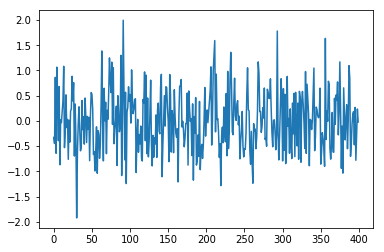

In [39]:
e = Y - y_hat
plt.plot(e)
plt.show()

# Solucion Iterativa

In [11]:
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin((1/2)*X**2 - (1/4)*Y**2 + 3)*np.cos(2*X + 1 - np.exp(Y))
colormap = plt.cm.get_cmap('RdYlGn')
znorm = Z - Z.min()
znorm /= znorm.ptp()
znorm.min(), znorm.max()
color = colormap(znorm)

In [12]:
ipv.figure()
ipv.plot_surface(X, Y, Z, color=color[..., :3])
ipv.show()

### Gradient Descent

Obtenemos el gradiente:
    
$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}\sum{(h(x_i) - y_i)}$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}\sum{(h(x_i) - y_i)}(x_i)$$

##### Regla de ACTUALIZACIÓN DE LOS PARÁMETROS

$$ \theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}\sum_{i=1}^N{[h(X_i)  -y_i]^2 } $$

In [40]:
def costFunc(X,Y,Theta_gd):
    """
    Calcula la función de costo con un Theta dado
    y el gradiende de la regresión lineal 
    """
    h_x = X@Theta_gd
    e2  = np.square(h_x - Y)
    J = np.sum(e2)/2*Y.shape[0]
    J_grad = (1/Y.shape[0])*(X.T@(h_x-Y))
    return J, J_grad

Matricialmente
$$ \nabla J = \frac{1}{N}X'(X\Theta - Y) $$

In [42]:
np.random.seed(2018)
Theta_gd = np.random.randn(4)

In [43]:
J , J_grad = costFunc(X,Y,Theta_gd)
J_grad

array([  2.85195708, 604.02706821,   6.27329926,  12.66909429])

$$ \theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$

In [44]:
def act_Theta(Theta,J_grad, alpha = 0.01):
    return Theta - alpha*J_grad

### Gradient Descent

In [45]:
def gradientDescent(X,Y,Theta_gd,alpha=0.01,iteraciones=1000):
    histJ = []
    Jgrad = []
    J , J_grad = costFunc(X,Y,Theta_gd)
    histJ.append(J)
    for i in range(1,iteraciones+1):
        Theta_gd = act_Theta(Theta_gd,J_grad,alpha=alpha)
        J , J_grad = costFunc(X,Y,Theta_gd)
        histJ.append(J)
        Jgrad.append(J_grad)
        if i%500 ==0:
            print("Función de costo en la iteración ", i, ": ",round(J,2))
    return Theta_gd , histJ, Jgrad

### Optimizamos

Función de costo en la iteración  500 :  206168.37
Función de costo en la iteración  1000 :  137228.4
Función de costo en la iteración  1500 :  118655.05
Función de costo en la iteración  2000 :  105318.99
Función de costo en la iteración  2500 :  94626.61
Función de costo en la iteración  3000 :  85881.21
Función de costo en la iteración  3500 :  78624.88
Función de costo en la iteración  4000 :  72525.82
Función de costo en la iteración  4500 :  67340.09
Función de costo en la iteración  5000 :  62886.48
Función de costo en la iteración  5500 :  59028.71
Función de costo en la iteración  6000 :  55662.91
Función de costo en la iteración  6500 :  52708.82
Función de costo en la iteración  7000 :  50103.41
Función de costo en la iteración  7500 :  47796.45
Función de costo en la iteración  8000 :  45747.26
Función de costo en la iteración  8500 :  43922.44
Función de costo en la iteración  9000 :  42294.14
Función de costo en la iteración  9500 :  40838.91
Función de costo en la iterac

Función de costo en la iteración  83000 :  28095.23
Función de costo en la iteración  83500 :  28095.23
Función de costo en la iteración  84000 :  28095.23
Función de costo en la iteración  84500 :  28095.23
Función de costo en la iteración  85000 :  28095.23
Función de costo en la iteración  85500 :  28095.23
Función de costo en la iteración  86000 :  28095.23
Función de costo en la iteración  86500 :  28095.23
Función de costo en la iteración  87000 :  28095.23
Función de costo en la iteración  87500 :  28095.23
Función de costo en la iteración  88000 :  28095.23
Función de costo en la iteración  88500 :  28095.23
Función de costo en la iteración  89000 :  28095.23
Función de costo en la iteración  89500 :  28095.23
Función de costo en la iteración  90000 :  28095.23
Función de costo en la iteración  90500 :  28095.23
Función de costo en la iteración  91000 :  28095.23
Función de costo en la iteración  91500 :  28095.23
Función de costo en la iteración  92000 :  28095.23
Función de c

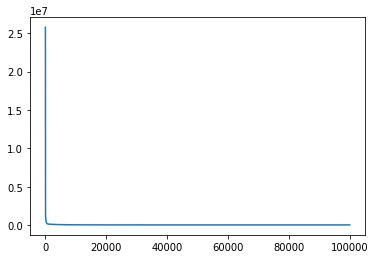

In [46]:
Theta_opt , hist_J , Jhist= gradientDescent(X,Y,Theta_gd,
                                      alpha=0.001,
                                     iteraciones=10**5)
plt.plot(hist_J)

## Evaluamos

In [47]:
costFunc(X,Y,reg_lin_Mat(X,Y)) # La funcion de costo con los parámetros óptimos

(28095.224873956373,
 array([-2.55351296e-16,  1.92130756e-13, -3.81916720e-16,  4.04010159e-15]))

In [48]:
print(Theta) # Solucion Analïtica 
print(Theta_opt) #Soluciòn iterativa

Jhist[-1]

[-0.05656091  0.0047699  -0.46871896  2.08066242]
[-0.05656051  0.0047716  -0.4687194   2.08058357]


array([ 4.26590426e-08,  1.81527929e-07, -4.68859754e-08, -8.40380920e-06])

### Visualizamos

In [53]:
pred = X@Theta

print(pred.shape)

(400,)


In [56]:
ipv.quickscatter(X[:, 1], X[:, 2], pred, size=1, marker="sphere")

# Sklearn

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()

model.fit(X, Y)

In [60]:
pred = model.predict(X)